In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ann_solver import NeuralNet, pack_params, unpack_params

In [2]:
def psi_trial(x, net):
    return x * net.forward(x)

def d_psi_trial(x, net):
    return net.forward(x) + x * net.derivative(x)

def rhs(x):
    return np.exp(-x / 5) * np.cos(x)

def residual(x, net):
    psi = psi_trial(x, net)
    dpsi = d_psi_trial(x, net)
    return dpsi + (1/5) * psi - rhs(x)

def loss_fn(x, net):
    return np.mean(residual(x, net)**2)

In [3]:
def objective(params, net, x_train):
    unpack_params(net, params)
    return loss_fn(x_train, net)

def train_net(n_hidden, x_train, activation='sigmoid'):
    net = NeuralNet(n_hidden=n_hidden, n_output=1, activation=activation)
    params0 = pack_params(net)
    result = minimize(objective, params0, args=(net, x_train),
                      method='BFGS', options={'disp': True, 'maxiter': 3000})
    unpack_params(net, result.x)
    return net

In [4]:
x_train = np.linspace(0, np.pi, 50).reshape(-1, 1)
x_test = np.linspace(0, np.pi, 200).reshape(-1, 1)
psi_exact = (np.exp(-x_test / 5) * np.sin(x_test)).flatten()

nets = {}
for n_hidden in [5, 10, 20]:
    print(f"Training network with {n_hidden} neurons...")
    nets[n_hidden] = train_net(n_hidden, x_train, activation='sigmoid')


Training network with 5 neurons...
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 151
         Function evaluations: 2856
         Gradient evaluations: 168
Training network with 10 neurons...
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 51
         Function evaluations: 1760
         Gradient evaluations: 55
Training network with 20 neurons...
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 99
         Function evaluations: 6882
         Gradient evaluations: 111


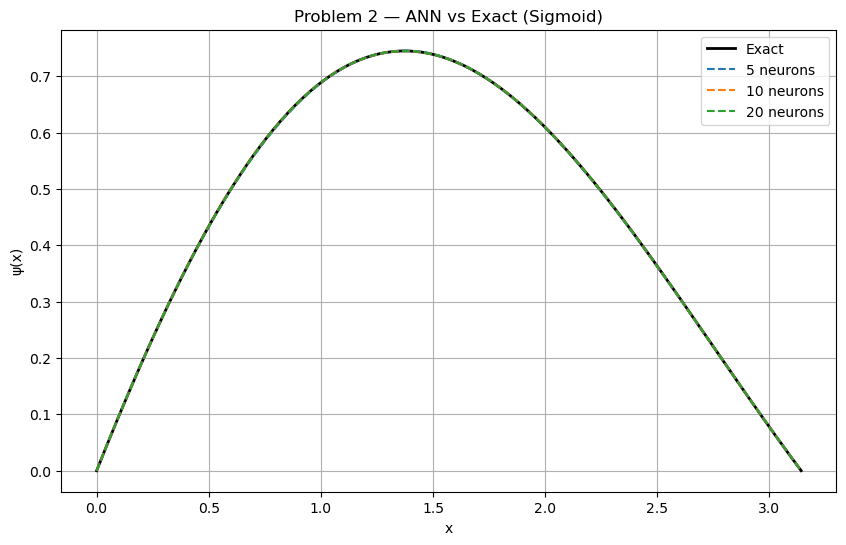

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, psi_exact, 'k', label='Exact', linewidth=2)

for n_hidden, net in nets.items():
    pred = psi_trial(x_test, net).flatten()
    plt.plot(x_test, pred, '--', label=f'{n_hidden} neurons')

plt.title("Problem 2 — ANN vs Exact (Sigmoid)")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.grid(True)
plt.legend()
plt.show()


Training ANN with 5 neurons for Problem 2


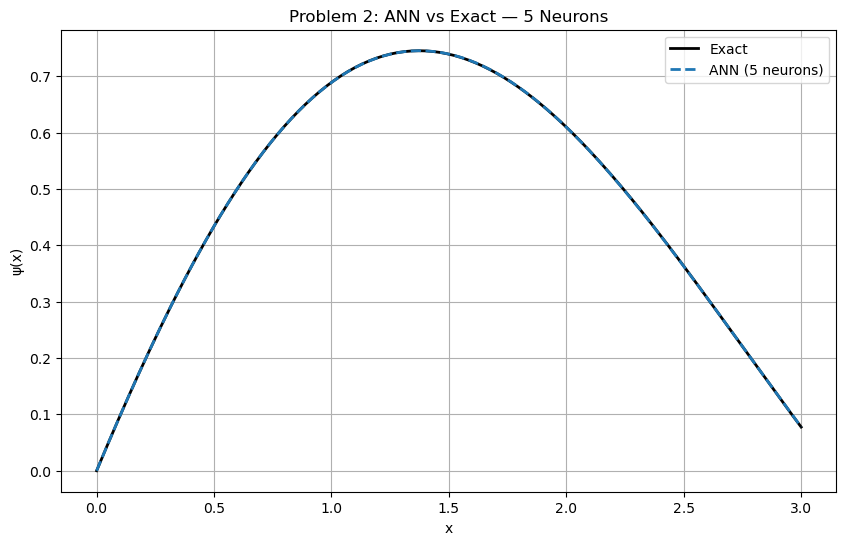

 Residual Loss: 1.507617e-06 | MSE: 4.022260e-08

Training ANN with 10 neurons for Problem 2


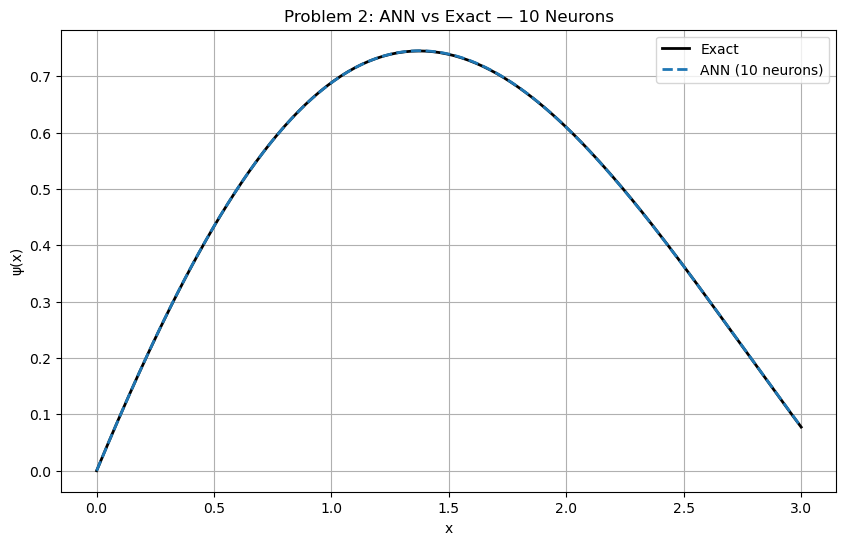

 Residual Loss: 2.849089e-06 | MSE: 9.498047e-08

Training ANN with 20 neurons for Problem 2


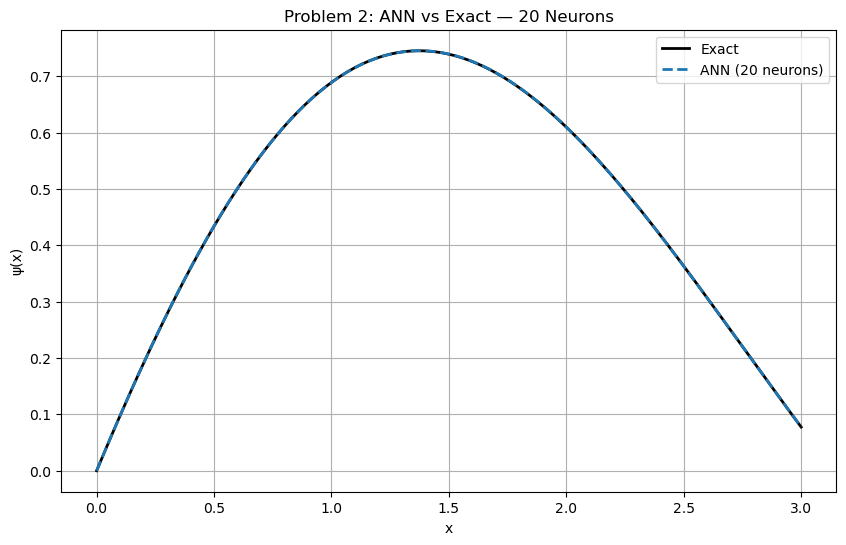

 Residual Loss: 1.475693e-06 | MSE: 4.752455e-08


In [17]:
x_train = np.linspace(0, 3, 50).reshape(-1, 1)
x_test = np.linspace(0, 3, 200).reshape(-1, 1)
psi_exact = (np.exp(-x_test / 5) * np.sin(x_test)).flatten()

neurons = [5, 10, 20]

for n_hidden in neurons:
    print(f"\nTraining ANN with {n_hidden} neurons for Problem 2")

    net = NeuralNet(n_hidden=n_hidden, n_output=1, activation='sigmoid')
    params0 = pack_params(net)

    result = minimize(objective, params0, args=(net, x_train),
                      method='BFGS', options={'disp': False, 'maxiter': 3000})
    unpack_params(net, result.x)

    psi_pred = psi_trial(x_test, net).flatten()
    mse = np.mean((psi_pred - psi_exact)**2)
    loss = loss_fn(x_train, net)

    plt.figure(figsize=(10, 6))
    plt.plot(x_test, psi_exact, 'k', label='Exact', linewidth=2)
    plt.plot(x_test, psi_pred, '--', label=f'ANN ({n_hidden} neurons)', linewidth=2)
    plt.title(f"Problem 2: ANN vs Exact — {n_hidden} Neurons")
    plt.xlabel('x')
    plt.ylabel('ψ(x)')
    plt.grid(True)
    plt.legend()
    plt.show()
    print(f" Residual Loss: {loss:.6e} | MSE: {mse:.6e}")


**Different Activation functions**

In [19]:
x_train = np.linspace(0, np.pi, 50).reshape(-1, 1)
x_test = np.linspace(0, np.pi, 200).reshape(-1, 1)
psi_exact = (np.exp(-x_test / 5) * np.sin(x_test)).flatten()

activations = ['tanh', 'sigmoid', 'relu']
nets = {}

# Train one model per activation
for act in activations:
    print(f"Training with activation: {act}")
    nets[act] = train_net(n_hidden=10, x_train=x_train, activation=act)

Training with activation: tanh
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 78
         Function evaluations: 2848
         Gradient evaluations: 89
Training with activation: sigmoid
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 70
         Function evaluations: 2400
         Gradient evaluations: 75
Training with activation: relu
         Current function value: 0.018010
         Iterations: 9
         Function evaluations: 4008
         Gradient evaluations: 125


C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


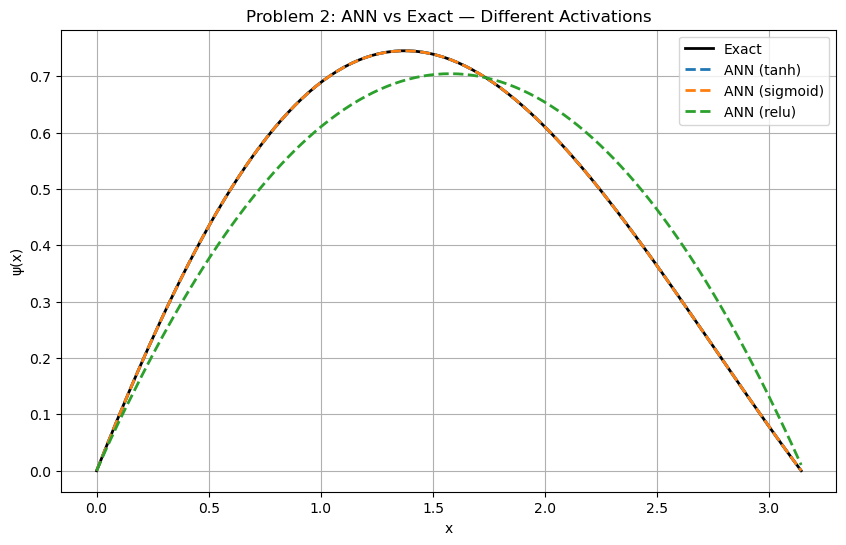

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, psi_exact, 'k', label='Exact', linewidth=2)

for act in activations:
    psi_pred = psi_trial(x_test, nets[act]).flatten()
    plt.plot(x_test, psi_pred, '--', label=f'ANN ({act})', linewidth=2)

plt.title("Problem 2: ANN vs Exact — Different Activations")
plt.xlabel("x"); plt.ylabel("ψ(x)")
plt.grid(True)
plt.legend()
plt.show()


In [23]:
neurons = [5, 10, 20]
nets = {}

for n_hidden in neurons:
    print(f" Training Problem 2 with {n_hidden} neurons...")
    net = NeuralNet(n_hidden=n_hidden, n_output=1, activation='sigmoid')
    params0 = pack_params(net)
    result = minimize(objective, params0, args=(net, x_train),
                      method='BFGS', options={'disp': False, 'maxiter': 3000})
    unpack_params(net, result.x)
    nets[n_hidden] = net

 Training Problem 2 with 5 neurons...
 Training Problem 2 with 10 neurons...
 Training Problem 2 with 20 neurons...


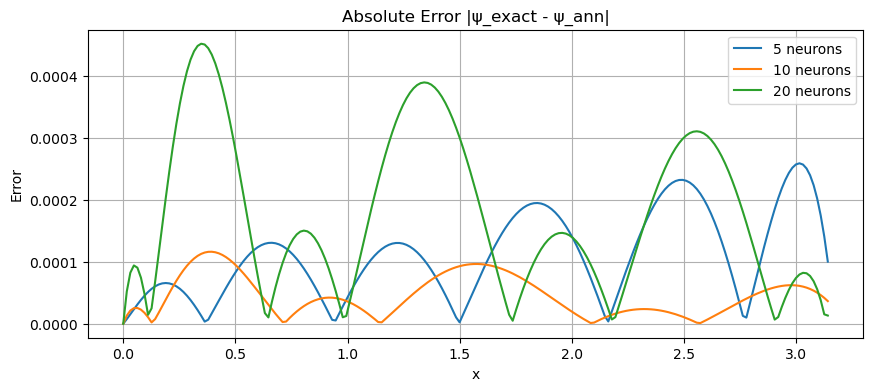

In [24]:
plt.figure(figsize=(10, 4))

for n_hidden, net in nets.items():
    pred = psi_trial(x_test, net).flatten()
    error = np.abs(pred - psi_exact)
    plt.plot(x_test, error, label=f'{n_hidden} neurons')

plt.title("Absolute Error |ψ_exact - ψ_ann|")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True) 
plt.legend()
plt.savefig("problem2_absolute_error_neurons.png", dpi=300)
plt.show()